<a href="https://colab.research.google.com/github/chmarano/IAEntregable2/blob/master/entregable2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalamos la libreria seaborn.

In [1]:
!pip install seaborn==0.9.0

    100% |████████████████████████████████| 215kB 24.0MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


Importamos las librerias numpy,panda,matplotlib y seaborn.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# La siguiente línea se utiliza para generar los gráficos en formato SVG los cuales son más legibles. 
%config InlineBackend.figure_format = 'svg'

Descargamos el dataset.

In [3]:
!wget https://raw.githubusercontent.com/chmarano/IAEntregable2/master/train.csv -O train.csv

--2019-04-16 20:02:34--  https://raw.githubusercontent.com/chmarano/IAEntregable2/master/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19171 (19K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  18.72K  --.-KB/s    in 0.01s   

2019-04-16 20:02:34 (1.49 MB/s) - ‘train.csv’ saved [19171/19171]



Leemos los datos y loslmacenamos en un DataFrame.Mostramos las 5 primeras instancias.

In [4]:
df = pd.read_csv('train.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Prediction
0,40,Male,1.9,1.0,231,16,55,4.3,1.6,0.6,False
1,64,Male,0.9,0.3,310,61,58,7.0,3.4,0.9,True
2,40,Female,2.1,1.0,768,74,141,7.8,4.9,1.6,False
3,32,Male,25.0,13.7,560,41,88,7.9,2.5,2.5,False
4,48,Male,0.7,0.2,326,29,17,8.7,5.5,1.7,False


Realizamos histogrmas para las variables Total_Bilirubin y Total_Protiens.

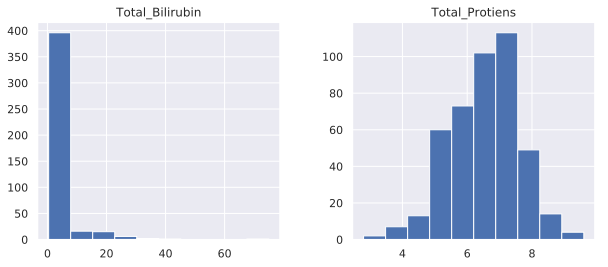

In [5]:
features = ['Total_Bilirubin', 'Total_Protiens']
df[features].hist(figsize=(10, 4));

Realizamos graficos de densidad para las variables anteriores.

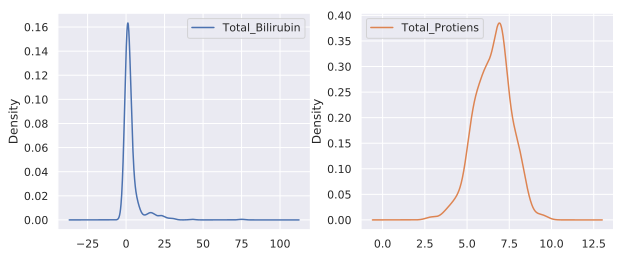

In [6]:
df[features].plot(kind='density', subplots=True, layout=(1, 2), 
                  sharex=False, figsize=(10, 4));

Mostramos la distribucion de observciones para la vaariable total_Bilirubin.

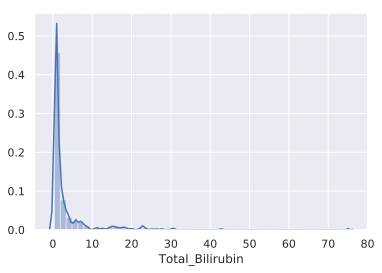

In [9]:
sns.distplot(df['Total_Bilirubin']);

Mostarmos un grafico de cajas para Total bilirubine.

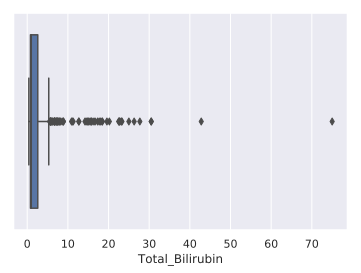

In [11]:
sns.boxplot(x='Total_Bilirubin', data=df)

Mostramos el grafico anterior junto con el grafico de violines para la misma variable.

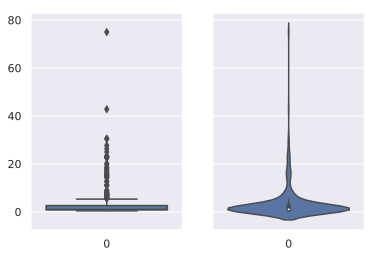

In [13]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df['Total_Bilirubin'], ax=axes[0]);
sns.violinplot(data=df['Total_Bilirubin'], ax=axes[1]);

Mostramos las estadisticas de la distribucion , para las variables total bilirubine y total protiens.

In [14]:
features = ['Total_Protiens', 'Total_Bilirubin']
df[features].describe()

,Total_Protiens,Total_Bilirubin
count,437.000000,437.000000
mean,6.524714,3.291762
std,1.069224,6.377841
min,2.800000,0.400000
25%,5.800000,0.800000
50%,6.600000,1.000000
75%,7.200000,2.600000
max,9.600000,75.000000


Realizamos una tabla de frecuencias para las predicciones.

In [15]:
df['Prediction'].value_counts()

False    310
True     127
Name: Prediction, dtype: int64

Realizamos un grafico de barras para el genero y las predicciones.



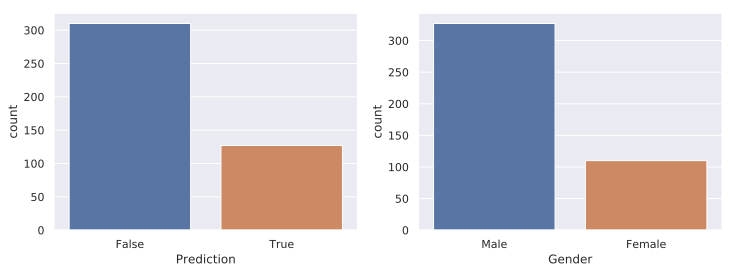

In [16]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='Prediction', data=df, ax=axes[0]);
sns.countplot(x='Gender', data=df, ax=axes[1]);

Realizamos una matriz de correlacion para los descriptores numericos.

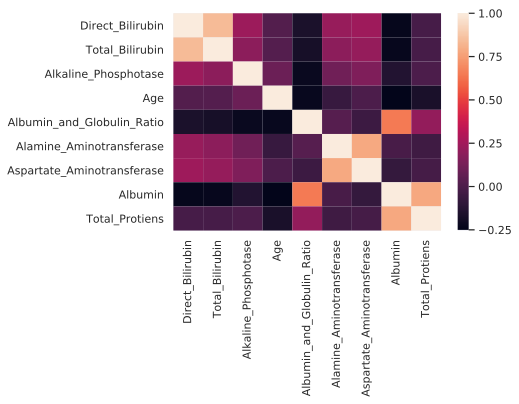

In [21]:
numerical = list(set(df.columns) - 
                 set(['Gender', 'Prediction']))

corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

Eliminamos las variables que estan altamenre correladas,porque no aportan demasiada informacion.

In [0]:
numerical = list(set(numerical) - 
                 set(['Direct_Bilirubin', 'Total_Bilirubin', 'Albumin', 'TotalProtiens']))

Realizamos  un diagrama de dispersion para las variables total bilirubin y total protiens

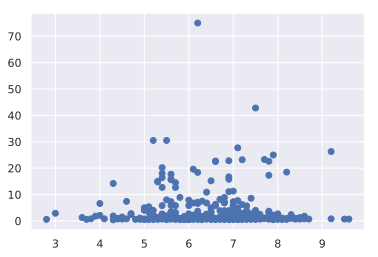

In [24]:
plt.scatter(df['Total_Protiens'], df['Total_Bilirubin']);

Mostramos es grafico anterior utilizando la libreria seborn.

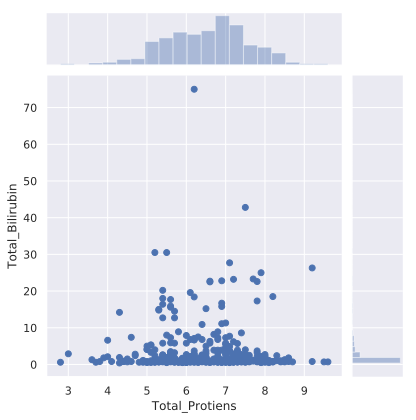

In [25]:
sns.jointplot(x='Total_Protiens', y='Total_Bilirubin', 
              data=df, kind='scatter');

Mostramos un grafico para las variables anteriores usando joinplot.

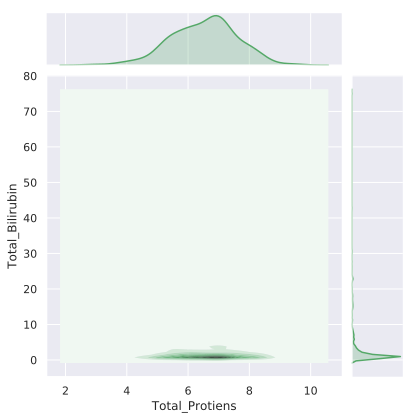

In [26]:
sns.jointplot('Total_Protiens', 'Total_Bilirubin', data=df,
              kind="kde", color="g");

Realizamos un diagrama de dispersion para variables mas correladas.

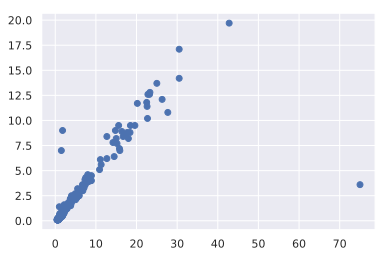

In [27]:
plt.scatter(df['Total_Bilirubin'], df['Direct_Bilirubin']);

Lo mismo para los graficas anteriores.

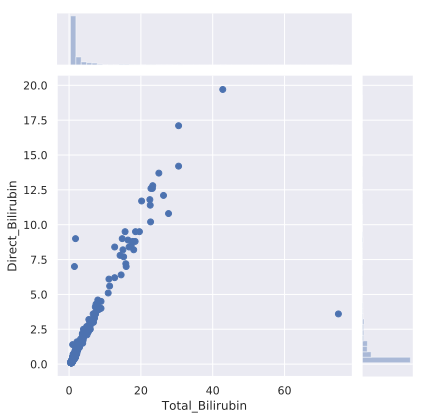

In [28]:
sns.jointplot(x='Total_Bilirubin', y='Direct_Bilirubin', 
              data=df, kind='scatter');

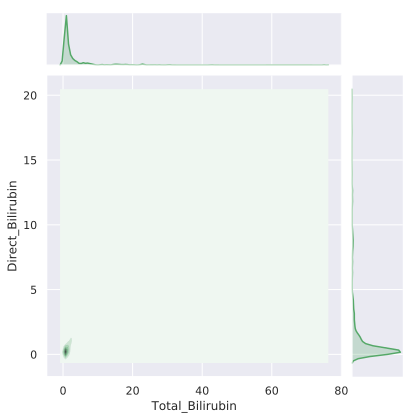

In [29]:
sns.jointplot('Total_Bilirubin', 'Direct_Bilirubin', data=df,
              kind="kde", color="g");

Mostramos la matriz de diagramas de dispersion para los descriptores numericos. 

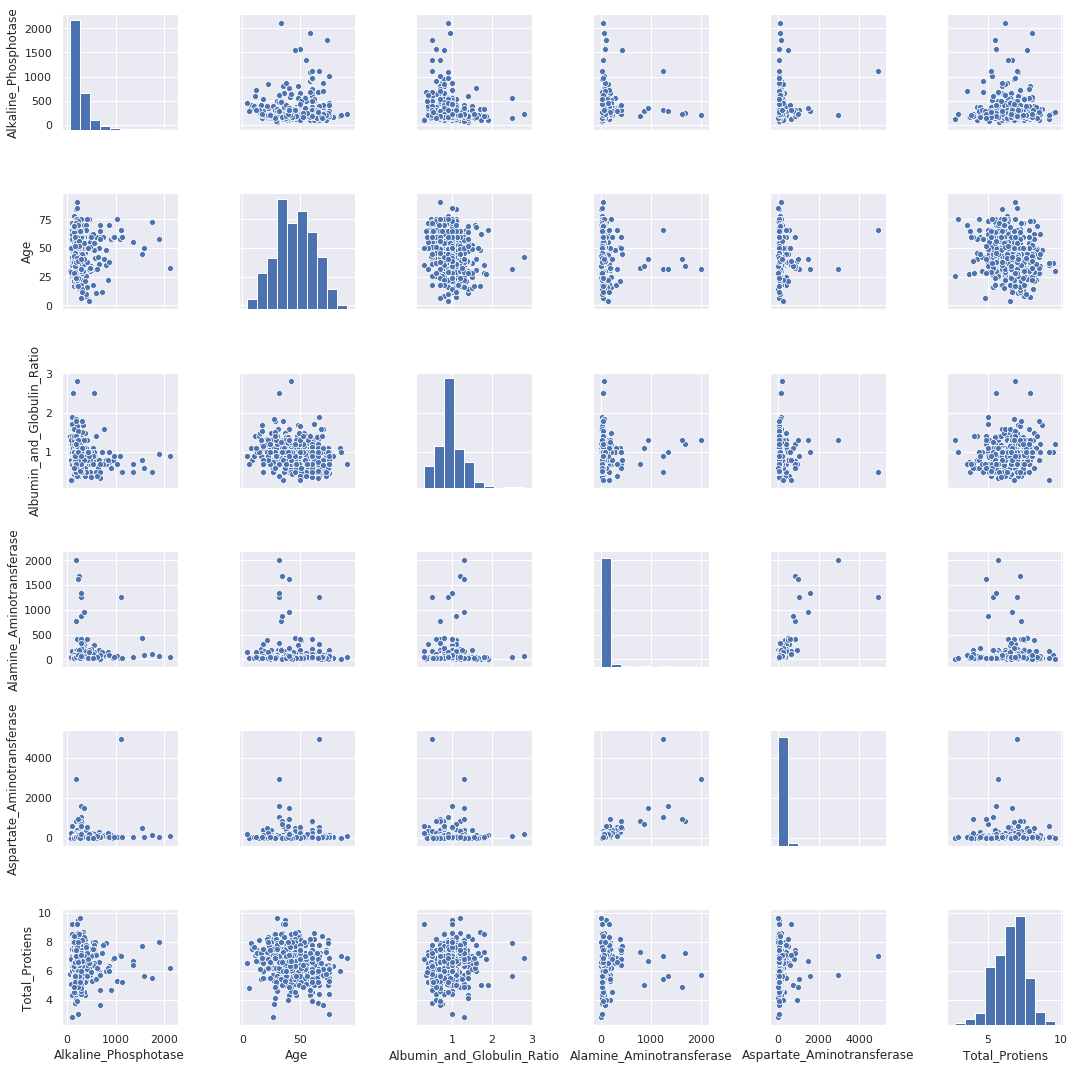

In [32]:
# Cambiamos la configuración a png ya que la generación de diagramas con SVG puede ser muy lenta en este caso
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical]);

In [0]:
# Volvemos a cambiar la configuración
%config InlineBackend.figure_format = 'svg'

Mostramos un grafico de dispersion para el parametro Prediction.

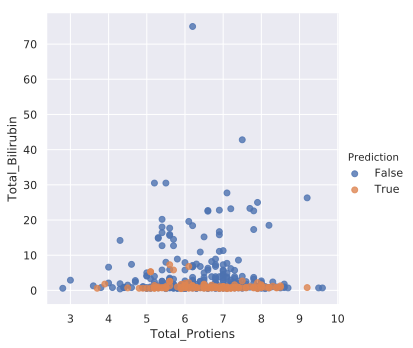

In [34]:
sns.lmplot('Total_Protiens', 'Total_Bilirubin', data=df, hue='Prediction', fit_reg=False);

Mostramos las distribuciones estadísticas de los descriptores numéricos, segun la prediccion.

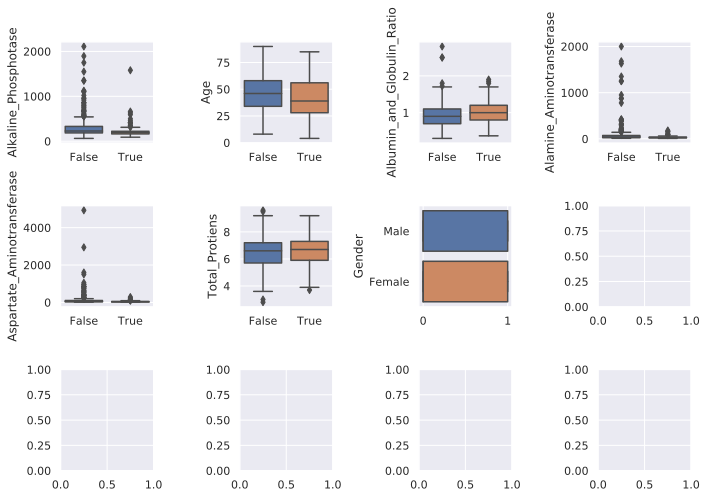

In [35]:
numerical.append('Gender')

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x='Prediction', y=feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();

Mostramos dos grafico de violines y de cajas, agrupados para la prediccion.

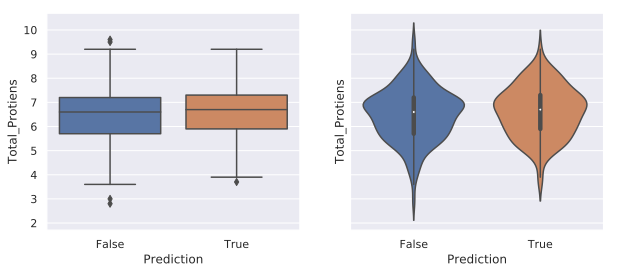

In [37]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x='Prediction', y='Total_Protiens', data=df, ax=axes[0]);
sns.violinplot(x='Prediction', y='Total_Protiens', data=df, ax=axes[1]);

Realizamos un diagrama de barras con un parametro categorico.

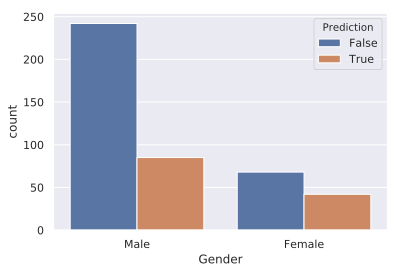

In [41]:
sns.countplot(x='Gender', hue='Prediction', data=df);

Realizamos una tabla de contingencia con descriptores categoricos.

In [42]:
pd.crosstab(df['Gender'], df['Prediction']).T

Gender,Female,Male
Prediction,,
False,68,242
True,42,85


Calculamos el ratio de prediccion por genero.

In [43]:
df.groupby(['Gender'])['Prediction'].agg([np.mean]).sort_values(by='mean', ascending=False).T

Gender,Female,Male
mean,0.381818,0.259939
